In [1]:
import requests
import pandas as pd

url = 'https://companiesmarketcap.com/'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)

dfs = pd.read_html(r.text)

In [144]:
df = dfs[0][:50]
df.head()

,Rank,Name,Market Cap,Price,Today,Price (30 days),Country
0,1,Apple AAPL,$2.415 T,$149.24,2.54%,NaN,🇺🇸 USA
1,2,Saudi Aramco 2222.SR,$2.413 T,$10.97,0.12%,NaN,🇸🇦 S. Arabia
2,3,Microsoft MSFT,$1.995 T,$266.82,2.03%,NaN,🇺🇸 USA
3,4,Alphabet (Google) GOOG,$1.534 T,"$2,334",1.66%,NaN,🇺🇸 USA
4,5,Amazon AMZN,$1.173 T,"$2,307",4.11%,NaN,🇺🇸 USA


In [145]:
df.dtypes


Rank                 int64
Name                object
Market Cap          object
Price               object
Today               object
Price (30 days)    float64
Country             object
dtype: object

### write a function to deal with the inconsistency of Market Cap unit

In [146]:
def billion(x):
    if x[-1] == 'T':
        x1 = x[1:] #拿掉美元符號
        x2 = x1[:-1] #拿掉尾巴
        return float(x2)*1000
    else:
        x1 = x[1:]
        x2 = x1[:-1]
        return float(x2) 

In [147]:
df['Market Cap(billion)'] = df['Market Cap'].astype('str') #change data type to slice
df['Market Cap(billion)'] =df.apply(lambda x: billion(x['Market Cap(billion)']), axis=1)
df['Price($)'] = df.apply(lambda x: x['Price'][1:], axis=1)
df.head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,Rank,Name,Market Cap,Price,Today,Price (30 days),Country,Market Cap(billion),Price($)
0,1,Apple AAPL,$2.415 T,$149.24,2.54%,NaN,🇺🇸 USA,2415.0,149.24
1,2,Saudi Aramco 2222.SR,$2.413 T,$10.97,0.12%,NaN,🇸🇦 S. Arabia,2413.0,10.97
2,3,Microsoft MSFT,$1.995 T,$266.82,2.03%,NaN,🇺🇸 USA,1995.0,266.82
3,4,Alphabet (Google) GOOG,$1.534 T,"$2,334",1.66%,NaN,🇺🇸 USA,1534.0,"2,334"
4,5,Amazon AMZN,$1.173 T,"$2,307",4.11%,NaN,🇺🇸 USA,1173.0,"2,307"


### seperate name into company name and symbol

In [7]:
df['Name'][1].split(' ')[:-1]

['Saudi', 'Aramco']

In [8]:
' '.join(df['Name'][1].split(" ")[:-1])

'Saudi Aramco'

In [140]:
df2 = df.drop(columns = ['Price (30 days)','Market Cap','Price','Price'])
df_rank = df2.set_index('Rank')
df_rank['Symbol'] = df_rank.apply(lambda x: x['Name'].split(" ")[-1], axis=1)
df_rank['Name'] = df_rank.apply(lambda x: ' '.join(x['Name'].split(" ")[:-1]), axis=1)
df_rank.head()

,Name,Today,Country,Market Cap(billion),Price($),Symbol
Rank,,,,,,
1,Apple,2.54%,🇺🇸 USA,2415.0,149.24,AAPL
2,Saudi Aramco,0.12%,🇸🇦 S. Arabia,2413.0,10.97,2222.SR
3,Microsoft,2.03%,🇺🇸 USA,1995.0,266.82,MSFT
4,Alphabet (Google),1.66%,🇺🇸 USA,1534.0,"2,334",GOOG
5,Amazon,4.11%,🇺🇸 USA,1173.0,"2,307",AMZN


### remove the country flag in order to plot 

In [137]:
df_rank['Country'][1][3:]


'USA'

In [141]:
df_rank['Country'][2:]

Rank
3             🇺🇸 USA
4             🇺🇸 USA
5             🇺🇸 USA
6             🇺🇸 USA
7             🇺🇸 USA
8             🇺🇸 USA
9          🇹🇼 Taiwan
10            🇺🇸 USA
11            🇺🇸 USA
12            🇺🇸 USA
13          🇨🇳 China
14            🇺🇸 USA
15            🇺🇸 USA
16            🇺🇸 USA
17            🇺🇸 USA
18       🇰🇷 S. Korea
19            🇺🇸 USA
20            🇺🇸 USA
21    🇨🇭 Switzerland
22            🇺🇸 USA
23          🇨🇳 China
24            🇺🇸 USA
25         🇫🇷 France
26            🇺🇸 USA
27            🇺🇸 USA
28            🇺🇸 USA
29            🇺🇸 USA
30    🇨🇭 Switzerland
31            🇺🇸 USA
32            🇺🇸 USA
33          🇨🇳 China
34        🇩🇰 Denmark
35            🇺🇸 USA
36            🇺🇸 USA
37          🇨🇳 China
38      🇦🇺 Australia
39    🇳🇱 Netherlands
40          🇮🇳 India
41          🇯🇵 Japan
42             🇬🇧 UK
43            🇺🇸 USA
44            🇺🇸 USA
45            🇺🇸 USA
46            🇺🇸 USA
47             🇬🇧 UK
48            🇺🇸 USA
49            🇺🇸 USA
50      

In [ ]:
df_rank['Country'] = df_rank.apply(lambda x :)

In [94]:
country = df_rank.groupby('Country')
country.get_group('🇨🇭 Switzerland')

,Name,Today,Country,Market Cap(billion),Price($),Symbol
Rank,,,,,,
21,Nestlé,0.11%,🇨🇭 Switzerland,339.29,122.95,NESN.SW
30,Roche,0.85%,🇨🇭 Switzerland,284.15,325.66,ROG.SW


In [18]:
df_rank.loc[df_rank['Country'] == '🇯🇵 Japan']

,Name,Today,Country,Market Cap(billion),Price($),Symbol
Rank,,,,,,
41,Toyota,0.48%,🇯🇵 Japan,219.83,159.98,TM


In [27]:
#pd.set_option('display.max_rows', None)
df_usa = df_rank.loc[df_rank['Country'] == '🇺🇸 USA']
sum(df_usa['Market Cap(billion)'])
df_usa.head()

,Name,Today,Country,Market Cap(billion),Price($),Symbol
Rank,,,,,,
1,Apple,2.54%,🇺🇸 USA,2415.00,149.24,AAPL
3,Microsoft,2.03%,🇺🇸 USA,1995.00,266.82,MSFT
4,Alphabet (Google),1.66%,🇺🇸 USA,1534.00,"2,334",GOOG
5,Amazon,4.11%,🇺🇸 USA,1173.00,"2,307",AMZN
6,Tesla,5.14%,🇺🇸 USA,789.03,761.61,TSLA


In [55]:
df_market_sum = df_rank.groupby('Country').sum().sort_values('Market Cap(billion)', ascending = False)
df_market_sum

,Market Cap(billion)
Country,
🇺🇸 USA,21389.28
🇨🇳 China,2428.79
🇸🇦 S. Arabia,2413.00
🇨🇭 Switzerland,817.97
🇫🇷 France,765.84
🇬🇧 UK,709.20
🇹🇼 Taiwan,483.93
🇮🇳 India,385.80
🇳🇱 Netherlands,379.55


In [104]:
country_100 = country_100.reset_index()

,Country,count
0,🇺🇸 USA,33
1,🇨🇳 China,4
2,🇨🇭 Switzerland,2
3,🇬🇧 UK,2
4,🇦🇺 Australia,1
5,🇩🇰 Denmark,1
6,🇫🇷 France,1
7,🇮🇳 India,1
8,🇯🇵 Japan,1
9,🇰🇷 S. Korea,1


In [109]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(15,9)})
# df = pd.DataFrame([
#     ['Jack', 78],
#     ['Mary', 67],
#     ['Mike', 90],
#     ['David', 81],
# ], columns=['Students', 'Math'])
#ax = sns.barplot(x= 'count', y='Country', data=country_100)
ax = sns.barplot(x= 'Country', y='count', data=country_100)
ax.set_title('Final Term')

ValueError: Could not interpret input 'Country'

In [85]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)


ax = df.plot.bar(rot=0)

pandas.core.frame.DataFrame

In [79]:
df

,Students,Math
0,Jack,78
1,Mary,67
2,Mike,90
3,David,81


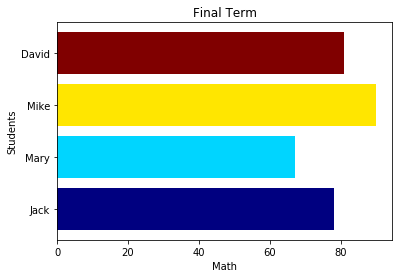

In [75]:
from matplotlib import cm
cmap = cm.jet(np.linspace(0, 1, len(students)))
plt.barh(x, math_scores, color=cmap)
plt.yticks(x, students)
plt.ylabel('Students')
plt.xlabel('Math')
plt.title('Final Term')
plt.show()

In [ ]:
各國家數長條圖
各國家數圓餅圖

市值長條圖
市值圓餅圖

In [114]:
country = df.groupby('Country')
country.size()

by_country = country.count()
by_country
#.columns = ['count']

country_100 = country.count().drop(columns = ['Today','Market Cap(billion)','Price($)','Symbol'])
country_100.columns = ['count']
country_100 = country_100.sort_values('count', ascending = False)
ax = country_100.plot.bar(rot=45)

Country
🇦🇺 Australia       1
🇨🇭 Switzerland     2
🇨🇳 China           4
🇩🇰 Denmark         1
🇫🇷 France          1
🇬🇧 UK              2
🇮🇳 India           1
🇯🇵 Japan           1
🇰🇷 S. Korea        1
🇳🇱 Netherlands     1
🇸🇦 S. Arabia       1
🇹🇼 Taiwan          1
🇺🇸 USA            33
dtype: int64